# Week 4: Subspace Clustering and projected clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1: Theoretical questions

1. Why is traditional clustering ill-suited for high dimensional data?
1. What is the goal of subspace clustering and projected clustering?
1. Why is exhaustive subspace cluster search infeasible in practice?
1. Give a definition of what a subspace cluster is according to the models proposed by Subclu, Clique and Proclus. How are they similar and where do they differ?



1. Because the clusters gets more sparse in higher dimensions. By adding a dimensions, we can only increase the distance. We can't use distance as a meassure anymore, it becomes meaningless. 
1. Cluster in a subset of dimensions. Projecting the points down to the dimensions we want to considder. (Top-down is easier to argue about when stopping than with bottom up)
1. For d dimensions we need to considder 2^d subsets 
1. How do we define what substace we use e.g.
   - Subclue: Evolution of DBSCAN
   - Clique: Hyper dimensional boxes/spheres, check if they're filled with datapoints, density. Bottom up
   - Proclus: Partitioning clustering in projections. Based on k-mediod.

## Exercise 2: CLIQUE
1. What is a subspace cluster in CLIQUE?
1. How is monotonicity used in CLIQUE?
1. Use the CLIQUE algorithm to compute the hidden subspace clusters in the following 6 dimensional data set.
    Compute the first step of the CLIQUE algorithm to detect dense cells. Use 3 equal intervals
    per dimension in the domain 0...100 (number of intervals $\xi = 3$) and consider a cell as dense
    if it contains at least 5 objects (density threshold $\tau = 21\%$).
   

In [4]:
# Dim1 Dim2 Dim3 Dim4 Dim5 Dim6
X = np.array([
    [6, 23, 22, 21, 31, 49],
    [7, 22, 21, 20, 51, 76],
    [26, 85, 75, 52, 53, 50],
    [28, 94, 76, 63, 76, 87],
    [29, 45, 93, 51, 54, 51],
    [35, 73, 76, 51, 52, 50],
    [38, 23, 22, 21, 33, 61],
    [41, 22, 21, 21, 32, 99],
    [56, 15, 66, 39, 36, 66],
    [58, 1, 14, 53, 52, 51],
    [66, 1, 40, 19, 86, 13],
    [70, 90, 25, 32, 70, 65],
    [71, 23, 21, 20, 3, 81],
    [80, 19, 42, 23, 57, 1],
    [82, 80, 6, 54, 81, 81],
    [82, 81, 38, 35, 81, 82],
    [82, 81, 77, 57, 81, 82],
    [82, 83, 44, 59, 81, 83],
    [82, 81, 35, 86, 81, 81],
    [84, 80, 66, 10, 81, 81],
    [86, 33, 59, 51, 54, 50],
    [89, 34, 36, 53, 54, 51],
    [92, 25, 27, 40, 14, 22]
])


# intervals [0,32] [33,67] [68,100]
regions = {"first": 0, "second": 0, "third": 0}
for x in X:
    if x[0] < 33:
        regions["first"] += 1
    elif x[0] < 68:
        regions["second"] +=1
    else:
        regions["third"] +=1
print(regions)

regions2 = {"0,0": 0, "0,1": 0, "0,2": 0,"1,0": 0, "1,1": 0, "1,2": 0,"2,0": 0, "2,1": 0, "2,2": 0}
for x in X:
    if x[0] < 33:
        if x[1] < 33:
            regions2["0,0"] += 1
        elif x[1] < 68:
            regions2["0,1"] +=1
        else:
            regions2["0,2"] +=1
    elif x[0] < 68:
        if x[1] < 33:
            regions2["1,0"] += 1
        elif x[1] < 68:
            regions2["1,1"] +=1
        else:
            regions2["1,2"] +=1
    else:
        if x[1] < 33:
            regions2["2,0"] += 1
        elif x[1] < 68:
            regions2["2,1"] +=1
        else:
            regions2["2,2"] +=1
print(regions2)


{'first': 5, 'second': 6, 'third': 12}
{'0,0': 2, '0,1': 1, '0,2': 2, '1,0': 5, '1,1': 0, '1,2': 1, '2,0': 3, '2,1': 2, '2,2': 7}


Clusters [{'dim': 0, 'clusters': [(33, 99)]}]
Clusters [{'dim': 0, 'clusters': [(33, 99)]}, {'dim': 1, 'clusters': [(0, 33), (66, 99)]}]
Clusters [{'dim': 0, 'clusters': [(33, 99)]}, {'dim': 1, 'clusters': [(0, 33), (66, 99)]}, {'dim': 2, 'clusters': [(0, 66)]}]
Clusters [{'dim': 0, 'clusters': [(33, 99)]}, {'dim': 1, 'clusters': [(0, 33), (66, 99)]}, {'dim': 2, 'clusters': [(0, 66)]}, {'dim': 3, 'clusters': [(0, 66)]}]
Clusters [{'dim': 0, 'clusters': [(33, 99)]}, {'dim': 1, 'clusters': [(0, 33), (66, 99)]}, {'dim': 2, 'clusters': [(0, 66)]}, {'dim': 3, 'clusters': [(0, 66)]}, {'dim': 4, 'clusters': [(33, 99)]}]
Clusters [{'dim': 0, 'clusters': [(33, 99)]}, {'dim': 1, 'clusters': [(0, 33), (66, 99)]}, {'dim': 2, 'clusters': [(0, 66)]}, {'dim': 3, 'clusters': [(0, 66)]}, {'dim': 4, 'clusters': [(33, 99)]}, {'dim': 5, 'clusters': [(33, 99)]}]


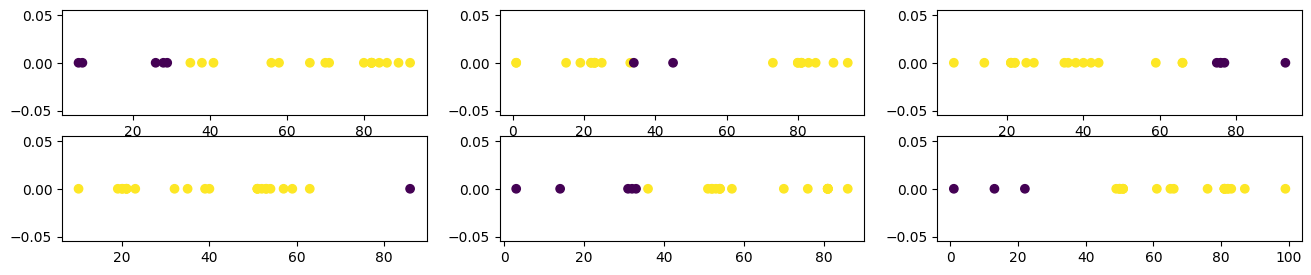

In [11]:
n,d = X.shape

starts = range(0,100, 100//3)
tau = 5

clusters = []
for i in range(d):
    X_ = X[:,i] #get slice of the dimension we're looking at
    dense_regions = []
    #we want to count #points in each interval
    for start in starts:
        count = ((X_ > start) * (X_ <=start+100//3)).sum() # (*) is AND for two vectors of booleans
        if( count > tau):
            dense_regions.append((start, start + 100//3))
    # print(dense_regions)
    #if we have two dense regions right next to each other we considder them to be same cluster
    clust = []
    if(len(dense_regions)==0):
        continue
    if(len(dense_regions)==1):
        clust.append(dense_regions[0])
    if(len(dense_regions)==2):
        #if they're next to each other we want to fuse, else we have two clusters
        if (dense_regions[0][1] == dense_regions[1][0]):
            clust.append((dense_regions[0][0], dense_regions[1][1])) #join the regions
        else:
            clust.append(dense_regions[0])
            clust.append(dense_regions[1])
    if(len(dense_regions)==3):
        #the whole region is dense because xi=3
        clust.append((dense_regions[0][0], dense_regions[2][1]))
    clusters.append({'dim': i, 'clusters': clust})

    print('Clusters', clusters)

fig, ax = plt.subplots(2,3, figsize=(16,3))
for i in range(2):
    for j in range(3):
        c=clusters[i*3+j]
        dim = c['dim']
        cl= c['clusters']
        X_ = X[:,dim]
        y = np.zeros((n,))
        for cs in cl:
            y[((X_>cs[0]) * (X_<=cs[1]))==1] = 1
        ax[i,j].scatter(X_, np.zeros((n,)),c=y)

## Exercise 3: PROCLUS

Consider the following four-dimensional data set:

In [14]:
X = np.array([
    ( 15 , 12 , 16 ,  9 ),  # A
    ( 14 , 13 , 18 ,  3 ),  # B
    ( 12 , 14 , 14 , 15 ),  # C 
    ( 16 , 13 , 19 , 19 ),  # D 
    (  5 ,  6 ,  9 ,  4 ),  # E 
    (  4 , 11 , 10 , 18 ),  # F 
    (  6 , 17 ,  8 , 13 ),  # G 
    (  6 ,  9 , 14 , 16 ),  # H 
    ( 14 , 19 , 13 , 15 ),  # I 
    ( 19 ,  3 , 15 , 14 ),  # J 
])

Calculate the following steps of a PROCLUS clustering using $k=3$ clusters. 
Please use the complete data set in the Algorithm (no sample; $A=\frac{10}{3}$).

1. Compute a set of four medoids M.
1. Use the first three medoids and compute the locality and $Z_{ij}$ values for each medoid.
1. Determine the optimal dimension set $D_i$ for each medoid $m_i$ (use $l=3$).

In [17]:
np.random.seed(0)
n,d = X.shape
k=3
A = 10/3. 
B= 4/3 
l=3

M = [np.random.randint(0, X.shape[0])]

L1 = lambda x, y: np.sum(np.abs(x-y))

while len(M) < k * B:
    dists = [0 if i in M else min([L1(X[i], X[j]) for j in M]) for i in range(n)]
    next_idx = np.argmax(dists)
    M.append(next_idx)

M = np.array(M) #M is indexes
Ms = X[M] 

#above is first phase essentially

# 2. Compute Z_ij's
Z = np.zeros((3,d))
for i,m in enumerate(Ms[:3]):
    delta = min([L1(m, m_) for j, m_ in enumerate(Ms) if not i==j])
    Li = np.array([x for x in X if (L1(m,x) <= delta)])
    Xij = np.abs(m-Li).mean(axis=0)
    Yi = np.mean(Xij)
    std = np.sqrt(((Xij-Yi)**2 / (d-1)).sum())
    Zij = (Xij-Yi) / std 
    Z[i] = Zij

print(Z)

#3. determine dims
dims = []
for i in range(3):
    ordered_idx = np.argsort(Z[i])
    first_dim = list(ordered_idx[:2])
    dims.append(first_dim)
    #need to make sure dim is not chosen again so fill with high number
    Z[i, first_dim[0]] = 20
    Z[i, first_dim[1]] = 20

missing_dims = k * (l-2) #the #dims we would need for something ?

Z_flat = Z.reshape(-1)
ordered_idx = np.argsort(Z_flat)
for idx in ordered_idx[:missing_dims]:
    #up to missing_dims
    i,j = idx //4, idx % 4
    dims[i].append(j)

print(dims)


[[ 1.37281295 -0.39223227 -0.98058068  0.        ]
 [-0.66927828 -0.51180103 -0.30183138  1.48291069]
 [ 0.26899507  1.29373818 -0.90945951 -0.65327373]]
[[2, 1, 3], [0, 1, 2], [2, 3, 0]]


## Exercise 4: OPTICS 
Draw the OPTICS plot for the following 2-d data set using Manhattan distance, $minpts=6$, $\epsilon = 2$. 
Start with $o = (0,4)$, then, once the ControlList is empty, restart with $p = (2,0)$.

In [18]:
X = np.array([ 
    (2,0),(2,0),(3,0),(3,0),(3,0),(3,0),(4,0),(4,0),(3,1),(3,1),(3,1),
    (4,1),(4,1),(4,1),(0,4),(0,4),(0,5),(0,5),(1,4),(1,4),(1,5),(1,5),
    (2,4),(3,4),(3,4),(3,5),(3,5),(3,5),(4,4),(4,4),(4,5),(4,5),(4,5)
])


![](graphics/W4.Q5.png)

Note: you do not need to do the
actual computation, but you may
refer to the figure for reading off
the reachability and core distances,
respectively.
Given the resulting OPTICS plot, which two settings $\epsilon=1,2$ correspond to a DBSCAN that outputs
two and three clusters, respectively?

In [ ]:
control_list = []

reachability_list = []

fig, ax = plt.subplots(1,1)
ax.bar(np.arange(n), reachability_list)


## Exercise 5: BIRCH/CF-Tree
Insert the following points into an empty CF-Tree and compute the micro clusters and associated cluster features (use the diameter D = 2R).

1. $P_1=(5,5)$ 
1. $P_2=(2,2)$
1. $P_3=(4,5)$
1. $P_4=(1,4)$
1. $P_5=(2,1)$.

The tree parameters are: $B=2$, $L=2$, $T=2$


<img src="graphics/formulas.png" width="1000"/>

In [ ]:
C = []
C=[(5,5)]
N = 1
LS = (5,5)
SS = (5**2, 5**2)



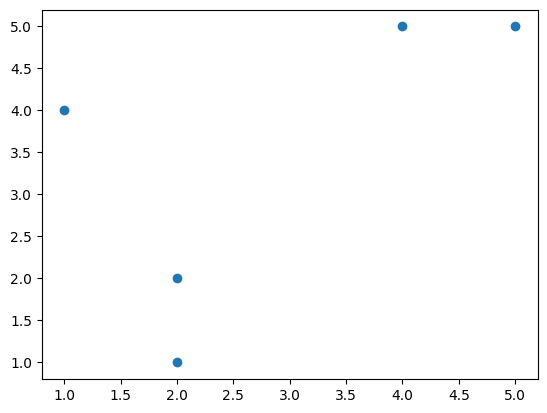

In [19]:
x = np.array([5,2,4,1,2])
y = np.array([5,2,5,4,1])

ax, fig = plt.subplots(1,1)
fig.scatter(x,y)

# Optional Exercises

## Exercise 6: SUBCLU
1. What is a subspace cluster in SUBCLU?
1. How is the monotonicity used in SUBCLU?

## Exercise 7: Proving Property of BIRCH 
In BIRCH [1], they claim that the the _average intra-cluster distance_ $D3$ can be computed efficiently and exactly from the clustering feature (CF) of two clusters. 
We aim to prove that claim here.

The average intra-cluster distance is defined as follows. 
Given $N_1$ d-dimensional data points in cluster: $C_1 = \{ X_i \}$ where $i = 1, \dots, N_1$, and $N_2$ datapoints in another cluster: $C_2 = \{ X_j \}$ where $j = N_1 + 1, \dots, N_1 + N_2$, 

$$
D3(C1, C2) =\left(\frac{\sum_{i=1}^{N_{1}+N_{2}} \sum_{j=1}^{N_{1}+N_{2}}\left(X_{i}-X_{j}\right)^{2}}{\left(N_{1}+N_{2}\right)\left(N_{1}+N_{2}-1\right)}\right)^{\frac{1}{2}} \qquad\quad\quad (1)
$$

and the CF for cluster $i$ is defined as a triple $CF_i = (N_i, LS_i, SS_i)$, where $LS_i = \sum_{j=1}^{N_i} X_j$ and $SS_i = \sum_{j=1}^{N_i} X_j^2$.

1. Given two CFs, $CF_1$ and $CF_2$, for clusters $C_1$ and $C_2$, respectively, show that $D3(C_1, C_2)$ can becomputed only from information in $CF_1$ and $CF_2$.
2. Compare the running times of Equation (1) and you derived algorithm. Which one is faster?

If you want, you could test your derived formula here. Look for the _TODO_ below.

In [ ]:
# D3 the slow way
import time
from tqdm import tqdm
fast = True
# Cluster statistics
def D3_slow(C1, C2): # Slow algorithm
    C = np.concatenate([C1, C2], axis=0)
    s = 0.
    
    N1, d = C1.shape
    N2, _ = C2.shape
    N,  _ = C.shape
    
    if fast: # Fast version of the slow algorithm
        C_ = C.reshape(N, 1, d)
        C  = C.reshape(1, N, d)
        D  = (C_ - C).reshape(N*N, 1, d)
        s  = (D @ D.reshape(N*N, d, 1)).sum()
    else: # Slow version of the slow algorithm
        for i in range(N):
            for j in range(N):
                s += np.dot((C[i] - C[j]), (C[i] - C[j]))

    s = s / ((N1 + N2)*(N1 + N2 -1))
    return np.sqrt(s)

# Statistics for fast implementation
LS = lambda C: np.sum(C, axis=0)
SS = lambda C: np.sum(C ** 2)

# TODO implement your fast algorithm here.
def D3_fast(C1, C2):
    N1, _ = C1.shape
    N2, _ = C2.shape
    LS1, SS1 = LS(C1), SS(C1)
    LS2, SS2 = LS(C2), SS(C2)

    return 0 # TODO return DS3

## FROM HERE ON IS JUST TESTING AND PLOTTING. YOU DO NOT NEED TO CODE ANYTHING ## 

# Generate random samples in two different clusters.
# Check that the two algorithms give the same result.
size = 4
C1 = np.random.randn(size, 2) * 0.5 
C2 = np.random.randn(size, 2) * 0.5 + 2
assert np.allclose(D3_slow(C1, C2), D3_fast(C1, C2))

## TEST running time for the two algorithms
repeats     = 20   # Average running time over `repeats` time.
size_from   = 10   # Data set size from
size_to     = 1010  # Dataset size to
size_step   = 100   # Step size
data_sizes  = range(size_from, size_to + 1, size_step) # Test sizes

def test(fn):
    times = []
    results = []
    
    for size in data_sizes:
        C1 = np.random.randn(size, 2) * 0.5 
        C2 = np.random.randn(size, 2) * 0.5 + 2
        
        t0 = time.time()
        for _ in range(repeats): 
              print(f'\rSize {size}: {1+_}/{repeats}', end="")
              t = fn(C1, C2)
        td = time.time() - t0
        print(f"\rSize {size}: \t{td / repeats:.6f} secs.")
        results.append(t)
        times.append(td / repeats)
    return times, results

print("Testing slow algorithm")
slows = test(D3_slow)
print("Testing fast algorithm")
fasts = test(D3_fast)

print("\n|  i  | %-9s | %-9s |" % ('Fast', 'Slow'))
print("-"*31)
for i, st, ft in zip(data_sizes, slows, fasts):
    print("| %3i | %9.5f | %9.5f |" % (i, ft, st))

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
ax.plot(data_sizes, fasts, 'r-o', label="Fast")
ax.plot(data_sizes, slows, 'b--o', label="Slow")
ax.set_ylabel('Seconds')
ax.set_xlabel('# Data rows')
ax.legend()

#### References:
[1] Zhang, T., Ramakrishnan, R. and Livny, M., 1996. BIRCH: an efficient data clustering method for very large databases. ACM Sigmod Record, 25(2), pp.103-114.